In [1]:
# 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import jieba

import collections
import os

In [2]:
# 函数定义
from collections import Counter
from snownlp import SnowNLP

def merge(path, fileName):
    trainName = '../models/__models__/{}_{}.csv'.format(path, fileName)
    testName = trainName.replace('train', 'test')
    train = pd.read_csv(trainName)
    test = pd.read_csv(testName)
    data = pd.concat([train, test])
    return data

def read_map(filename):
    with open(Configure.root_data_path + filename, encoding='utf-8') as f:
        dictionary = dict()
        for line in f.readlines():
            line = line.strip().split(' ')
            dictionary[line[0]] = line[1]
        return dictionary

def read_file_word2dict(filename):
    with open(filename, 'r') as f:
        dictionary = dict()
        for line in f.readlines():
            line = line.strip().split(' ')
            for word in line:
                if word not in dictionary:
                    dictionary[word] = len(dictionary) + 1
        return dictionary
    
def read_file_word2set(filename, encoding = 'utf-8'):
    with open(filename, 'r', encoding = encoding) as f:
        dictionary = set()
        for line in f.readlines():
            line = line.strip().split(' ')
            for word in line:
                dictionary.add(word)
        return dictionary

def get_neg_words(data_df, stop_set = set(), feature = 'words', label = 'Score'):
    data_df_neg = data_df[data_df[label] == 1]
    return get_words(data_df_neg, stop_set = stop_set, feature = feature)

def get_keywords(data_df, stop_set = set(), feature = 'key_word', label = -1):
    dictionary = []
    score = data_df['Score'].values
    for i, word in enumerate(data_df[feature].values):
        word = str(word)
        if len(stop_set) == 0:
            if word != 'nan' and score[i] == label:
                dictionary.append(word)
        else:
            if word != 'nan' and score[i] == label and word not in stop_set:
                dictionary.append(word)
    return dictionary

def get_words(data_df, stop_set = set(), feature = 'words'):
    data_df = data_df[feature].values
    dictionary = []
    for sent in data_df:
        sent = sent[1:-1]
        sent = sent.split(';')
        for word in sent:
            if len(stop_set) == 0:
                if word != '':
                    dictionary.append(word)
            else:
                if word != '' and word not in stop_set:
                    dictionary.append(word)
    return dictionary

def build_dataset(words, vocabulary_size = 5000):
    from collections import Counter
    count = [['UNK', -1]]
    count.extend(Counter(words).most_common(vocabulary_size - 1))
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    data = list()
    unk_count = 0
    for word in words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0
            unk_count += 1
        data.append(index)
    count[0][1] = unk_count
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return data, count, dictionary, reverse_dictionary


def senti_snownlp(dicuss):
    if dicuss == '': return 0.5
    return SnowNLP(dicuss).sentiments

def clean_str(x, stop_word = '，'):
    words = list(jieba.cut(x))
    strbuild = '['
    for word in words:
        if word != stop_word:
            strbuild += word + ';'
    if ';' in strbuild: strbuild = strbuild[:-1]
    strbuild += ']'
    return strbuild    

def clean_str(words, stop_list):
    words = words[1:-1]
    words = words.split(';')
    strbuild = '['
    for word in words:
        if word not in stop_list:
            strbuild += word + ';'
    if ';' in strbuild: strbuild = strbuild[:-1]
    strbuild += ']'
    return strbuild    

def getdictionary(topK = 10, stop_set = set(), label = 5, maxLen = 5000):
    data_keyword = pd.read_csv(model_path + 'data_keyword.csv')
    data_score = data.copy()
    data_score = pd.merge(data_keyword, data_score[['Id', 'Score']], on = 'Id', how = 'left')
    all_words = []
    for i in range(topK):
        words = get_keywords(data_score, stop_set = stop_set, feature = 'key_word_' + str(i), label = label)
        all_words.extend(words)
    word_num, count, dictionary, reverse_dictionary = build_dataset(all_words, vocabulary_size=min(maxLen, len(all_words)))
    print(count[0:100])
    return dictionary

# test
from collections import Counter
print(Counter(['a', 'a', 'v', 'b', 'b', 'b', 'c', 'd', 'd', 'd', 'b']).most_common(3))

print(senti_snownlp('你好'))

significant_dictionary = read_file_word2dict('../input/significance.txt')
print(significant_dictionary)

import collections
buffer = collections.deque(maxlen=3)
print(buffer)
print(''.join(list(buffer)))
print(len(buffer))

# 停用词 读取
stop_list = read_file_word2set('../input/stop_word.txt')
print(len(stop_list))
print(list(stop_list)[0:100])

[('b', 4), ('d', 3), ('a', 2)]
0.5312500000000001
{'交通': 1, '车': 2, '巴': 3, '索道': 4, '飞机': 5, '住宿': 6, '酒店': 7, '客栈': 8, '旅馆': 9, '民宿': 10, '房间': 11, '宾馆': 12, '床': 13, '窗': 14, '食物': 15, '吃': 16, '味道': 17, '饭': 18, '菜': 19, '干粮': 20, '食品': 21, '零食': 22, '带水': 23, '水果': 24, '饮料': 25, '矿泉水': 26, '餐馆': 27, '饭店': 28, '景': 29, '山水': 30, '风光': 31, '环境': 32, '导游': 33, '司机': 34, '讲解': 35, '解说': 36, '工作人员': 37, '旺季': 38, '节假日': 39, '高峰': 40, '国庆': 41, '春节': 42, '黄金周': 43, '十一': 44, '拥挤': 45, '热闹': 46, '堵': 47, '吵闹': 48, '安静': 49, '轻松': 50, '宁静': 51, '清静': 52, '幽静': 53, '悠闲': 54, '平静': 55, '坑': 56, '骗': 57, '失望': 58, '忽悠': 59, '亲子': 60, '家庭': 61, '儿童': 62, '儿子': 63, '双人': 64, '微信': 65, '厕所': 66, '烧香': 67}
deque([], maxlen=3)

0
1207
['', '呼啦', '之一', '当', '；', '得', '不经意', '传', '吗', '不但', '喔唷', '五', '饱', '逢', '哗', '当庭', '每时每刻', '从不', '日见', '如期', '待', '然则', '从古至今', '串行', '起来', '可见', '经常', '没', '那个', '上去', '别说', '紧接着', '当然', '嘎嘎', '啥', '不时', '为着', '向着', '趁早', '敞开儿', '对', '忽然', '倘使', '互相', '匆匆', '１'

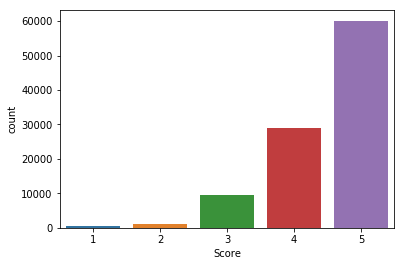

[5 4 3 2 1]
(100000, 3) (30000, 2)


In [3]:
# 加载数据集
model_path = '../input/'
testFileExist = True

trainFile = model_path + 'train_first.csv'
testFile = model_path + 'predict_first.csv'

train = pd.read_csv(trainFile)
test = pd.read_csv(testFile)

# 数据清洗
# train.drop_duplicates(subset = 'Discuss', keep = 'first', inplace = True)

sns.countplot(x = 'Score',data = train)
plt.show()

print(train['Score'].unique())  # 采取多分类？
print(train.shape, test.shape)


test['Score'] = -1
data = pd.concat([train, test])

# model_path = '../input/subset12/'
# data = pd.read_csv(model_path + 'train_score12.csv')
# testFileExist = False

In [4]:
# snownlp 情感分析
if not os.path.exists(model_path + 'senti_snownlp.csv'):
    print('senti_snownlp file not exists...')
    senti_snownlp_df = data[['Id', 'Discuss']].copy()
    senti_snownlp_df['senti_snownlp'] = senti_snownlp_df['Discuss'].apply(lambda x : senti_snownlp(x))
    del senti_snownlp_df['Discuss']
    senti_snownlp_df.to_csv(model_path + 'senti_snownlp.csv', index = False)
    data = pd.merge(data, senti_snownlp_df, on = 'Id', how = 'left')
else:
    print('senti_snownlp file exists...')
    senti_snownlp_df = pd.read_csv(model_path + 'senti_snownlp.csv')
    data = pd.merge(data, senti_snownlp_df, on = 'Id', how = 'left')

    
# 结巴分词
if not os.path.exists(model_path + 'data_jieba.csv'):    
    data_jieba = data[['Id', 'Discuss']].copy()
    data_jieba['words_jieba'] = data_jieba['Discuss'].apply(lambda x : get_jieba_words(x))
    del data_jieba['Discuss']
    data_jieba.to_csv(model_path + 'data_jieba.csv', index = False, encoding = "utf-8")
else:
    print('data_jieba file exists...')
    data_jieba = pd.read_csv(model_path + 'data_jieba.csv')

data_jieba.head()

senti_snownlp file exists...
data_jieba file exists...


,Id,words_jieba
0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,[好大;的;一个;游乐;公园;已经;去;了;2;次;但;感觉;还;没有;玩够;似的;！;会;...
1,bc578e6d-123e-3833-9a46-d0b4d7dccd0c,[景色;秀丽]
2,5e03c67a-8103-3b61-9052-82e269cf1c48,[辉煌;与;屈辱;也;都;成为;了;过去]
3,68988e16-af63-34a2-a9aa-8e594d492a3a,[东方明珠;广播;电视塔;是;上海;的;标志性;文化景观;之一;位于;浦东新区;陆家嘴;塔高...
4,e1813faf-2268-32b3-9bcf-41cb845e6728,[特色;的;建筑;各式;的;小店;好吃;的;小吃;还有;沙滩;和;朋友;和;家人;去;游玩;...


In [5]:
# 字符串的长度
data['strLen'] = data['Discuss'].apply(lambda x : len(x))
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130000 entries, 0 to 129999
Data columns (total 5 columns):
Id               130000 non-null object
Discuss          130000 non-null object
Score            130000 non-null int64
senti_snownlp    130000 non-null float64
strLen           130000 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.0+ MB
None


,Id,Discuss,Score,senti_snownlp,strLen
0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,好大的一个游乐公园，已经去了2次，但感觉还没有玩够似的！会有第三，第四次的,5,0.521543,37
1,f4d51947-eac4-3005-9d3c-2f32d6068a2d,新中国成立也是在这举行，对我们中国人来说有些重要及深刻的意义！,4,0.996441,31
2,74aa7ae4-03a4-394c-bee0-5702d3a3082a,庐山瀑布非常有名，也有非常多个瀑布，只是最好看的非三叠泉莫属，推荐一去,4,0.449366,35
3,099661c2-4360-3c49-a2fe-8c783764f7db,个人觉得颐和园是北京最值的一起的地方，不过相比下门票也是最贵的，比起故宫的雄伟与气势磅礴，颐...,5,0.985191,61
4,97ca672d-e558-3542-ba7b-ee719bba1bab,迪斯尼一日游,5,0.972308,6


In [6]:
def data_word_feature(data_word, feature_word = 'words'):
    # 去除停用词
    stop_list = read_file_word2set('../input/stop_word.txt')
    
    # all words
    dictionary = get_words(data_word, stop_list, feature_word)
    print(len(dictionary))
    word_num, count, dictionary, reverse_dictionary = build_dataset(dictionary, vocabulary_size=50000)
    print(count[:200])

    # negative words
    neg_words = get_neg_words(pd.merge(data_word, data[['Id', 'Score']], on = 'Id', how = 'left'), stop_list, feature_word, 'Score')
    print('neg_words len: ', len(neg_words))
    word_num_neg, count_neg, dictionary_neg, reverse_dictionary_neg = build_dataset(neg_words, vocabulary_size=5000)
    print(count_neg[:100])

    # 群里siginicant word
    significant_dictionary =  read_file_word2dict(model_path + 'significance.txt')
        
    # encoding significant words
    def significant_word(word, dictionary = significant_dictionary):
        sent = word[1:-1]
        words = sent.split(';')
        encoding = 0.0
        arra = []
        for word in words:
            if word in dictionary:
                arra.append(dictionary[word])
        if len(arra) == 0: return 0
        arra = sorted(arra)
        for a in arra:
            encoding = 1.0 * len(dictionary) * encoding + a
        return encoding

    # neg_words 出现的总数
    def neg_words_sum(word, dictionary = dictionary_neg):
        sent = word[1:-1]
        words = sent.split(';')
        cnt = 0
        for word in words:
            if word in dictionary: cnt += 1
        return cnt

    # neg_words 出现的频次
    def neg_words_ratio(word, dictionary = dictionary_neg):
        sent = word[1:-1]
        words = sent.split(';')
        if len(words) == 0: return ''
        cnt = 0
        for word in words:
            if word in dictionary: cnt += 1
        return cnt / len(words)


    def words_to_number(word, dictionary):
        sent = word[1:-1]
        words = sent.split(';')
        data = []
        for word in words:
            if word in dictionary: data.append(dictionary[word])
            else: data.append(0)
        return data

    def words_to_sum(word, dictionary):
        sent = word[1:-1]
        words = sent.split(';')
        data = []
        for word in words:
            if word in dictionary: data.append(dictionary[word])
            else: data.append(0)
        return np.sum(data)

    def words_to_max(word, dictionary):
        sent = word[1:-1]
        words = sent.split(';')
        data = []
        for word in words:
            if word in dictionary.keys(): 
                data.append(dictionary[word])
            else: data.append(0)
        return np.max(data)

    def words_to_std(word, dictionary):
        sent = word[1:-1]
        words = sent.split(';')
        data = []
        for word in words:
            if word in dictionary: data.append(dictionary[word])
            else: data.append(0)
        return np.std(data)

    def words_to_last(word, dictionary):
        sent = word[1:-1]
        words = sent.split(';')
        if len(words) == 0: return ''
        return dictionary[words[0]] if words[0] in dictionary else 0


    def words_to_first(word, dictionary):
        sent = word[1:-1]
        words = sent.split(';')
        if len(words) == 0: return ''
        return dictionary[words[-1]] if words[-1] in dictionary else 0

    def words_len(word):
        sent = word[1:-1]
        words = sent.split(';')
        return len(words)
    
    def hasNtusdPos(word):
        sent = word[1:-1]
        words = sent.split(';')
        if len(words) == 0: return ''
        for word in words:
            if word in ntusd_pos:
                return 1
        return 0
    
    def hasNtusdNum(word, ntusd):
        sent = word[1:-1]
        words = sent.split(';')
        if len(words) == 0: return 0
        cnt = 0
        for word in words:
            if word in ntusd:
                cnt += 1
        return cnt
    
    def hasNtusdNeg(word):
        sent = word[1:-1]
        words = sent.split(';')
        if len(words) == 0: return ''
        for word in words:
            if word in ntusd_neg:
                return 1
        return 0
    
    data_word['word_len_'+ feature_word] = data_word[feature_word].apply(lambda x : words_len(x))
    data_word['word_max_'+ feature_word] = data_word[feature_word].apply(lambda x : words_to_max(x, dictionary))
    data_word['word_std_'+ feature_word] = data_word[feature_word].apply(lambda x : words_to_std(x, dictionary))
    data_word['word_sum_'+ feature_word] = data_word[feature_word].apply(lambda x : words_to_sum(x, dictionary))
    data_word['word_last_'+ feature_word] = data_word[feature_word].apply(lambda x : words_to_last(x, dictionary))
    data_word['word_first_'+ feature_word] = data_word[feature_word].apply(lambda x : words_to_first(x, dictionary))
    data_word['neg_word_sum_'+ feature_word] = data_word[feature_word].apply(lambda x : neg_words_sum(x, dictionary_neg))
    data_word['neg_word_ratio_'+ feature_word] = data_word[feature_word].apply(lambda x : neg_words_ratio(x, dictionary_neg))
    data_word['significant_word_encoding_'+ feature_word] = data_word[feature_word].apply(lambda x : significant_word(x, significant_dictionary))
        
    # ntusd_pos
    data_word['word_ntusd_hasPos'+ feature_word] = data_word[feature_word].apply(lambda x : hasNtusdPos(x))
    data_word['word_ntusd_hasNeg'+ feature_word] = data_word[feature_word].apply(lambda x : hasNtusdNeg(x))
    data_word['word_ntusd_hasPosNum'+ feature_word] = data_word[feature_word].apply(lambda x : hasNtusdNum(x, ntusd_pos))
    data_word['word_ntusd_hasNegNum'+ feature_word] = data_word[feature_word].apply(lambda x : hasNtusdNum(x, ntusd_neg))
    
    # get key word dictionary
    dict_5 = getdictionary(topK = 10, stop_set = stop_list, label = 5, maxLen = 5000)
    data_word['word_max_'+ feature_word + 'score_5'] = data_word[feature_word].apply(lambda x : words_to_max(x, dict_5))
    data_word['word_std_'+ feature_word + 'score_5'] = data_word[feature_word].apply(lambda x : words_to_std(x, dict_5))
    data_word['word_sum_'+ feature_word + 'score_5'] = data_word[feature_word].apply(lambda x : words_to_sum(x, dict_5))
    data_word['word_last_'+ feature_word + 'score_5'] = data_word[feature_word].apply(lambda x : words_to_last(x,dict_5))
    data_word['word_first_'+ feature_word + 'score_5'] = data_word[feature_word].apply(lambda x : words_to_first(x, dict_5))
    
    dict_4 = getdictionary(topK = 10, stop_set = stop_list, label = 4, maxLen = 5000)
    data_word['word_max_'+ feature_word + 'score_4'] = data_word[feature_word].apply(lambda x : words_to_max(x, dict_4))
    data_word['word_std_'+ feature_word + 'score_4'] = data_word[feature_word].apply(lambda x : words_to_std(x, dict_4))
    data_word['word_sum_'+ feature_word + 'score_4'] = data_word[feature_word].apply(lambda x : words_to_sum(x, dict_4))
    data_word['word_last_'+ feature_word + 'score_4'] = data_word[feature_word].apply(lambda x : words_to_last(x,dict_4))
    data_word['word_first_'+ feature_word + 'score_4'] = data_word[feature_word].apply(lambda x : words_to_first(x, dict_4))
    
    dict_3 = getdictionary(topK = 10, stop_set = stop_list, label = 3, maxLen = 5000)
    data_word['word_std_'+ feature_word + 'score_3'] = data_word[feature_word].apply(lambda x : words_to_std(x, dict_3))
    data_word['word_sum_'+ feature_word + 'score_3'] = data_word[feature_word].apply(lambda x : words_to_sum(x, dict_3))
    data_word['word_last_'+ feature_word + 'score_3'] = data_word[feature_word].apply(lambda x : words_to_last(x,dict_3))
    data_word['word_first_'+ feature_word + 'score_3'] = data_word[feature_word].apply(lambda x : words_to_first(x, dict_3))
    
    dict_2 = getdictionary(topK = 10, stop_set = stop_list, label = 2, maxLen = 5000)
    data_word['word_max_'+ feature_word + 'dict_2'] = data_word[feature_word].apply(lambda x : words_to_max(x, dict_2))
    data_word['word_std_'+ feature_word + 'dict_2'] = data_word[feature_word].apply(lambda x : words_to_std(x, dict_2))
    data_word['word_sum_'+ feature_word + 'dict_2'] = data_word[feature_word].apply(lambda x : words_to_sum(x, dict_2))
    data_word['word_last_'+ feature_word + 'dict_2'] = data_word[feature_word].apply(lambda x : words_to_last(x,dict_2))
    data_word['word_first_'+ feature_word + 'dict_2'] = data_word[feature_word].apply(lambda x : words_to_first(x, dict_2))
    
    dict_1 = getdictionary(topK = 10, stop_set = stop_list, label = 1, maxLen = 5000)
    data_word['word_max_'+ feature_word + 'dict_1'] = data_word[feature_word].apply(lambda x : words_to_max(x, dict_1))
    data_word['word_std_'+ feature_word + 'dict_1'] = data_word[feature_word].apply(lambda x : words_to_std(x, dict_1))
    data_word['word_sum_'+ feature_word + 'dict_1'] = data_word[feature_word].apply(lambda x : words_to_sum(x, dict_1))
    data_word['word_last_'+ feature_word + 'dict_1'] = data_word[feature_word].apply(lambda x : words_to_last(x,dict_1))
    data_word['word_first_'+ feature_word + 'dict_1'] = data_word[feature_word].apply(lambda x : words_to_first(x, dict_1))
    
    return data_word
# 加载 词典集
ntusd_pos = read_file_word2set(model_path + 'NTUSD_positive_simplified.txt', encoding = 'utf-8')
ntusd_neg = read_file_word2set(model_path + 'NTUSD_negative_simplified.txt', encoding = 'utf-8')

# hancks 分词
train_word = pd.read_csv(model_path + 'train_word.csv')
if testFileExist: 
    test_word = pd.read_csv(model_path + 'predict_word.csv')
    data_word = pd.concat([train_word, test_word])
else:
    data_word = train_word
    
stop_list = read_file_word2set(model_path + 'stop_word.txt')
# data_word['words'] = data_word['words'].apply(lambda x : clean_str(x, stop_list = stop_list))

# 群里siginicant word
significant_dictionary =  read_file_word2dict(model_path + 'significance.txt')
def contain(word, key):
    return 1 if key in word else 0

for _, key in enumerate(significant_dictionary.keys()):
    data_word['significant_key_{}'.format(_)] = data_word['words'].apply(lambda x : contain(x, key))

data_word = data_word_feature(data_word, feature_word = 'words')
data = pd.merge(data, data_word.drop(['words'], axis = 1), on = 'Id', how = 'left')

# jieba 分词
data_jieba = data_word_feature(data_jieba, feature_word = 'words_jieba')
data = pd.merge(data, data_jieba.drop(['words_jieba'], axis = 1), on = 'Id', how = 'left')

2005197
[['UNK', 45072], ('人', 19245), ('不错', 17065), ('<br', 13191), ('一个', 12210), ('地方', 11896), ('好', 11706), ('景区', 11426), ('值得', 9536), ('景点', 8664), ('感觉', 8189), ('美', 7932), ('风景', 7747), ('比较', 6853), ('>rn', 6659), ('走', 6570), ('里面', 6434), ('景色', 6375), ('门票', 6349), ('次', 6283), ('玩', 6208), ('真的', 6034), ('天', 5995), ('看到', 5820), ('很好', 5529), ('元', 5450), ('时间', 5164), ('点', 4784), ('年', 4680), ('特别', 4625), ('说', 4578), ('北京', 4559), ('方便', 4516), ('最', 4498), ('看看', 4476), ('两', 4451), ('西湖', 4349), ('坐', 4266), ('小时', 4134), ('建筑', 4108), ('喜欢', 4096), ('小', 3969), ('太', 3909), ('下', 3857), ('一定', 3758), ('>n', 3721), ('里', 3696), ('历史', 3689), ('中国', 3671), ('觉得', 3657), ('后', 3622), ('中', 3508), ('建议', 3482), ('游客', 3395), ('适合', 3391), ('票', 3310), ('挺', 3268), ('旅游', 3253), ('晚上', 3231), ('第一', 3218), ('特色', 3208), ('位于', 3132), ('再', 3126), ('有点', 3078), ('推荐', 3073), ('很大', 3072), ('山', 2989), ('黄山', 2960), ('游', 2928), ('一下', 2926), ('吃', 2895), ('座', 2886),

[['UNK', 0], ('值得', 20), ('失望', 20), ('没什么', 18), ('差', 18), ('景区', 18), ('门票', 18), ('坑', 17), ('不好玩', 16), ('差评', 15), ('不值', 14), ('垃圾', 13), ('次', 13), ('说', 12), ('景点', 11), ('人', 10), ('不想', 10), ('坑人', 10), ('太', 10), ('根本', 10), ('退', 9), ('退票', 9), ('司机', 9), ('意思', 9), ('没啥', 9), ('收费', 9), ('小时', 9), ('推荐', 9), ('全', 9), ('里面', 9), ('后悔', 8), ('骗子', 8), ('消费', 8), ('排队', 8), ('坑爹', 8), ('买', 8), ('一点', 8), ('知道', 8), ('元', 8), ('太差', 7), ('导游', 7), ('千万别', 7), ('评论', 7), ('贵', 7), ('收', 7), ('这种', 7), ('完全', 7), ('<br', 7), ('地方', 7), ('一个', 7), ('东西', 7), ('无聊', 6), ('黑', 6), ('钱', 6), ('太贵', 6), ('再也', 6), ('票', 6), ('投诉', 6), ('服务', 6), ('字', 6), ('缆车', 6), ('好', 6), ('再', 6), ('车', 6), ('真心', 6), ('特色', 6), ('破', 5), ('糟糕', 5), ('极差', 5), ('没意思', 5), ('>n', 5), ('上当', 5), ('最差', 5), ('团', 5), ('太多', 5), ('酒店', 5), ('买票', 5), ('工作人员', 5), ('票价', 5), ('烂', 5), ('感觉', 5), ('不敢', 5), ('体验', 5), ('停车费', 5), ('浪费时间', 5), ('特别', 5), ('山上', 5), ('买了', 5), ('骗', 5), ('比较', 5), ('

[['UNK', 0], ('没什么', 50), ('人', 41), ('景点', 41), ('地方', 36), ('门票', 33), ('推荐', 31), ('一个', 30), ('贵', 25), ('意思', 25), ('太', 24), ('感觉', 24), ('没啥', 22), ('性价比', 22), ('好', 22), ('景区', 21), ('不好', 20), ('坑', 20), ('特色', 20), ('失望', 19), ('太多', 19), ('玩', 19), ('差', 18), ('东西', 18), ('般', 17), ('无聊', 17), ('有点', 17), ('里面', 17), ('商业', 16), ('好看', 16), ('比较', 16), ('真心', 15), ('值得', 15), ('不错', 15), ('觉得', 15), ('不值', 14), ('可看', 14), ('特别', 14), ('实在', 13), ('项目', 13), ('少', 13), ('没意思', 12), ('建议', 12), ('卖', 12), ('不好玩', 11), ('元', 11), ('服务', 11), ('普通', 11), ('挺', 11), ('还行', 10), ('排队', 10), ('次', 10), ('路过', 10), ('必要', 10), ('票价', 10), ('公园', 10), ('花', 10), ('小', 10), ('一些', 10), ('收费', 9), ('收', 9), ('风景', 9), ('建筑', 9), ('现在', 9), ('人造', 8), ('后悔', 8), ('>n', 8), ('块', 8), ('高', 8), ('古城', 8), ('<br', 8), ('所谓', 8), ('说', 8), ('名气', 8), ('一点', 8), ('还要', 8), ('适合', 8), ('景观', 8), ('完全', 8), ('全', 8), ('想', 8), ('再', 8), ('旅游', 8), ('古镇', 7), ('岛', 7), ('电梯', 7), ('钱', 7), ('

In [7]:
# 情感分析
train_senti = pd.read_csv(model_path + "train_sentiment.csv")
if testFileExist: 
    test_senti = pd.read_csv(model_path + "predict_sentiment.csv")
    data_senti = pd.concat([train_senti, test_senti])
else:
    data_senti = train_senti
    
data = pd.merge(data, data_senti, on = 'Id', how = 'left')
data.head()

,Id,Discuss,Score,senti_snownlp,strLen,significant_key_0,significant_key_1,significant_key_2,significant_key_3,significant_key_4,...,word_std_words_jiebadict_2,word_sum_words_jiebadict_2,word_last_words_jiebadict_2,word_first_words_jiebadict_2,word_max_words_jiebadict_1,word_std_words_jiebadict_1,word_sum_words_jiebadict_1,word_last_words_jiebadict_1,word_first_words_jiebadict_1,sentiment
0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,好大的一个游乐公园，已经去了2次，但感觉还没有玩够似的！会有第三，第四次的,5,0.521543,37,0,0,0,0,0,...,428.031077,2314,0,0,1575,328.589048,2083,0,0,1
1,f4d51947-eac4-3005-9d3c-2f32d6068a2d,新中国成立也是在这举行，对我们中国人来说有些重要及深刻的意义！,4,0.996441,31,0,0,0,0,0,...,132.925882,1502,317,0,1599,369.789400,2640,0,0,1
2,74aa7ae4-03a4-394c-bee0-5702d3a3082a,庐山瀑布非常有名，也有非常多个瀑布，只是最好看的非三叠泉莫属，推荐一去,4,0.449366,35,0,0,0,0,0,...,589.941052,4434,267,0,434,151.476488,1523,357,0,0
3,099661c2-4360-3c49-a2fe-8c783764f7db,个人觉得颐和园是北京最值的一起的地方，不过相比下门票也是最贵的，比起故宫的雄伟与气势磅礴，颐...,5,0.985191,61,0,0,0,0,0,...,560.823121,8091,0,0,2389,501.018540,5002,0,0,1
4,97ca672d-e558-3542-ba7b-ee719bba1bab,迪斯尼一日游,5,0.972308,6,0,0,0,0,0,...,552.000000,1104,0,1104,274,35.000000,478,274,204,1


In [8]:
# 情感分析
train_senti = pd.read_csv(model_path + "train_sentiment_self.csv")
if testFileExist:
    test_senti = pd.read_csv(model_path + "predict_sentiment_self.csv")
    data_senti = pd.concat([train_senti, test_senti])
else:
    data_senti = train_senti
    
data = pd.merge(data, data_senti, on = 'Id', how = 'left')
data.head()

,Id,Discuss,Score,senti_snownlp,strLen,significant_key_0,significant_key_1,significant_key_2,significant_key_3,significant_key_4,...,word_sum_words_jiebadict_2,word_last_words_jiebadict_2,word_first_words_jiebadict_2,word_max_words_jiebadict_1,word_std_words_jiebadict_1,word_sum_words_jiebadict_1,word_last_words_jiebadict_1,word_first_words_jiebadict_1,sentiment,sentiment_self
0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,好大的一个游乐公园，已经去了2次，但感觉还没有玩够似的！会有第三，第四次的,5,0.521543,37,0,0,0,0,0,...,2314,0,0,1575,328.589048,2083,0,0,1,0
1,f4d51947-eac4-3005-9d3c-2f32d6068a2d,新中国成立也是在这举行，对我们中国人来说有些重要及深刻的意义！,4,0.996441,31,0,0,0,0,0,...,1502,317,0,1599,369.789400,2640,0,0,1,1
2,74aa7ae4-03a4-394c-bee0-5702d3a3082a,庐山瀑布非常有名，也有非常多个瀑布，只是最好看的非三叠泉莫属，推荐一去,4,0.449366,35,0,0,0,0,0,...,4434,267,0,434,151.476488,1523,357,0,0,1
3,099661c2-4360-3c49-a2fe-8c783764f7db,个人觉得颐和园是北京最值的一起的地方，不过相比下门票也是最贵的，比起故宫的雄伟与气势磅礴，颐...,5,0.985191,61,0,0,0,0,0,...,8091,0,0,2389,501.018540,5002,0,0,1,1
4,97ca672d-e558-3542-ba7b-ee719bba1bab,迪斯尼一日游,5,0.972308,6,0,0,0,0,0,...,1104,0,1104,274,35.000000,478,274,204,1,1


In [9]:
# 地点分析
train_address = pd.read_csv(model_path + 'train_address.csv')
if testFileExist:
    test_address = pd.read_csv(model_path + 'predict_address.csv')
    data_address = pd.concat([train_address, test_address])
else:
    data_address = train_address

def max_address(address, dictionary):
    address = address[1:-1]
    address = address.split(';')
    if len(address) == 0: return ''
    data = []
    for add in address:
        if add in dictionary: data.append(dictionary[add])
        else: data.append(0)
    return np.max(data)

def sum_address(address, dictionary):
    address = address[1:-1]
    address = address.split(';')
    if len(address) == 0: return ''
    cnt = 0
    for add in address:
        if add in dictionary: cnt += 1
    return cnt

def ratio_address(address, dictionary):
    address = address[1:-1]
    address = address.split(';')
    if len(address) == 0: return ''
    cnt = 0
    for add in address:
        if add in dictionary: cnt += 1
    return cnt / len(address)


# top 100 的旅游景区
address_all = get_words(data_address, feature='address_list')
word_num, count, dictionary, reverse_dictionary = build_dataset(address_all, vocabulary_size=100)
data_address['address_all_max'] = data_address['address_list'].apply(lambda x : max_address(x, dictionary))
data_address['address_all_sum'] = data_address['address_list'].apply(lambda x : sum_address(x, dictionary))
data_address['address_all_ratio'] = data_address['address_list'].apply(lambda x : ratio_address(x, dictionary))

# 差评 旅游景区
address = get_neg_words(pd.merge(data_address, data[['Id', 'Score']], on = 'Id', how = 'left'), feature='address_list')
word_num_neg, count_neg, dictionary_neg, reverse_dictionary_neg = build_dataset(address, vocabulary_size=100)
print(len(address))
print(count)
data_address['address_neg_all'] = data_address['address_list'].apply(lambda x : max_address(x, dictionary_neg))
data_address['address_neg_sum'] = data_address['address_list'].apply(lambda x : sum_address(x, dictionary_neg))
data_address['address_neg_ratio'] = data_address['address_list'].apply(lambda x : ratio_address(x, dictionary_neg))

del data_address['address_list']
data_address.head(100)
data = pd.merge(data, data_address,  on = 'Id', how = 'left')

399
[['UNK', 63963], ('北京', 4659), ('西湖', 4379), ('中国', 3818), ('黄山', 2976), ('杭州', 2591), ('泰山', 1940), ('故宫', 1758), ('夏天', 1363), ('三清山', 1240), ('天安门', 1098), ('九寨沟', 1062), ('上海', 937), ('张家界', 906), ('北京市', 838), ('西塘', 808), ('都江堰', 779), ('乌镇', 694), ('颐和园', 686), ('鼓浪屿', 651), ('丽江', 632), ('西安', 605), ('南京', 596), ('天池', 590), ('龙门', 537), ('圆明园', 535), ('夫子庙', 523), ('雷峰塔', 514), ('衢州', 506), ('灵隐寺', 484), ('苏州', 480), ('庐山', 451), ('南锣鼓巷', 442), ('石窟', 432), ('青海湖', 428), ('后山', 417), ('绍兴', 410), ('宏村', 406), ('千岛湖', 379), ('宋城', 372), ('天坛', 371), ('名山', 369), ('太湖', 369), ('瘦西湖', 367), ('峨眉山', 367), ('灵山', 367), ('街道', 366), ('大昭寺', 361), ('南天门', 348), ('宁波', 346), ('八达岭', 345), ('青城山', 342), ('中山陵', 341), ('丽江古城', 337), ('布达拉宫', 332), ('秦淮河', 304), ('天门', 304), ('三亚', 300), ('什刹海', 291), ('浙江', 288), ('澳门', 285), ('长白山', 283), ('南山', 283), ('香山', 282), ('漓江', 278), ('广州', 275), ('西海', 274), ('成都', 274), ('东湖', 274), ('武汉', 271), ('月牙泉', 269), ('华山', 268), ('紫禁城', 266), 

In [10]:
# 载入hankcs分词 情绪窗口
senti_window_hankcs = pd.read_csv(model_path + 'data_senti_window_hancks.csv')
senti_window_hankcs.head()

data = pd.merge(data, senti_window_hankcs, on = 'Id', how = 'left')

# 载入结巴分词 情绪窗口
senti_window_jieba = pd.read_csv(model_path + 'data_senti_window_jieba.csv')
senti_window_jieba.head()

data = pd.merge(data, senti_window_jieba, on = 'Id', how = 'left')

In [11]:
# 某个词时候出现过
def wordExist(discuss, word = ''):
    return 1 if word in discuss else 0

data['word_tijian'] = data['Discuss'].apply(lambda x : wordExist(x, '体检'))

In [12]:
data.head()

,Id,Discuss,Score,senti_snownlp,strLen,significant_key_0,significant_key_1,significant_key_2,significant_key_3,significant_key_4,...,senti_min_window_5_words_jieba,senti_std_window_5_words_jieba,senti_avg_window_5_words_jieba,senti_median_window_5_words_jieba,senti_max_window_7_words_jieba,senti_min_window_7_words_jieba,senti_std_window_7_words_jieba,senti_avg_window_7_words_jieba,senti_median_window_7_words_jieba,word_tijian
0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,好大的一个游乐公园，已经去了2次，但感觉还没有玩够似的！会有第三，第四次的,5,0.521543,37,0,0,0,0,0,...,0.228059,0.249524,0.502780,0.390102,0.947072,0.124269,0.250820,0.474661,0.389459,0
1,f4d51947-eac4-3005-9d3c-2f32d6068a2d,新中国成立也是在这举行，对我们中国人来说有些重要及深刻的意义！,4,0.996441,31,0,0,0,0,0,...,0.526233,0.135817,0.765783,0.822042,0.969790,0.526233,0.119520,0.824474,0.873439,0
2,74aa7ae4-03a4-394c-bee0-5702d3a3082a,庐山瀑布非常有名，也有非常多个瀑布，只是最好看的非三叠泉莫属，推荐一去,4,0.449366,35,0,0,0,0,0,...,0.058690,0.308193,0.481977,0.419622,0.983864,0.058690,0.329884,0.428539,0.370336,0
3,099661c2-4360-3c49-a2fe-8c783764f7db,个人觉得颐和园是北京最值的一起的地方，不过相比下门票也是最贵的，比起故宫的雄伟与气势磅礴，颐...,5,0.985191,61,0,0,0,0,0,...,0.212710,0.185634,0.608282,0.581842,0.939794,0.207578,0.191555,0.623142,0.599820,0
4,97ca672d-e558-3542-ba7b-ee719bba1bab,迪斯尼一日游,5,0.972308,6,0,0,0,0,0,...,0.972308,0.000000,0.972308,0.972308,0.972308,0.972308,0.000000,0.972308,0.972308,0


In [13]:
# 属性统计
train_property = pd.read_csv(model_path + 'train_property.csv')
test_property = pd.read_csv(model_path + 'predict_property.csv')

data_property = pd.concat([train_property, test_property])
data_property_describe = data_property.describe()
data_property_describe.head()

,bg,mg,nl,nx,qg,ud,uj,uz,ug,ul,...,wf_ratio,wn_ratio,wm_ratio,ws_ratio,wp_ratio,wb_ratio,wh_ratio,end_ratio,begin_ratio,entropy
count,130000.0,130000.000000,130000.0,130000.000000,130000.0,130000.0,130000.0,130000.0,130000.0,130000.0,...,130000.0,130000.0,130000.0,130000.0,130000.0,130000.0,130000.0,130000.0,130000.0,130000.000000
mean,0.0,0.000031,0.0,0.336431,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.877371
std,0.0,0.005547,0.0,2.042694,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.812567
min,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.386294


In [14]:
columns = data_property_describe.columns
filter_columns = []
for col in columns:
    if data_property_describe.loc['std', col] > 0:
        filter_columns.append(col)
        
filter_columns.append('Id')
data = pd.merge(data, data_property[filter_columns], on = 'Id', how = 'left')

In [15]:
# 余弦相似度
# data_similarity = pd.read_csv(model_path + 'data_similarity.csv')
# data_similarity.head()

# data = pd.merge(data, data_similarity, on = 'Id', how = 'left')

In [16]:
# 加载词向量
data_vector = pd.read_csv(model_path + 'data_vector.csv')
data_vector.describe()

data = pd.merge(data, data_vector, on = 'Id', how = 'left')

In [17]:
# 弱模型的特征 无效果
# data = pd.merge(data, merge('train_ridge', 'doufu'), on = 'Id', how = 'left')

# data = pd.merge(data, merge('train_ridge', '1'), on = 'Id', how = 'left')
# data = pd.merge(data, merge('train_ridge', '2'), on = 'Id', how = 'left')
# data = pd.merge(data, merge('train_ridge', '3'), on = 'Id', how = 'left')
# data = pd.merge(data, merge('train_ridge', '4'), on = 'Id', how = 'left')

# data = pd.merge(data, merge('train_lasso', '1'), on = 'Id', how = 'left')
# data = pd.merge(data, merge('train_lasso', '2'), on = 'Id', how = 'left')
# data = pd.merge(data, merge('train_lasso', '3'), on = 'Id', how = 'left')
# data = pd.merge(data, merge('train_lasso', '4'), on = 'Id', how = 'left')

In [18]:
data.head()

,Id,Discuss,Score,senti_snownlp,strLen,significant_key_0,significant_key_1,significant_key_2,significant_key_3,significant_key_4,...,Vector_190,Vector_191,Vector_192,Vector_193,Vector_194,Vector_195,Vector_196,Vector_197,Vector_198,Vector_199
0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,好大的一个游乐公园，已经去了2次，但感觉还没有玩够似的！会有第三，第四次的,5,0.521543,37,0,0,0,0,0,...,-0.004621,0.008280,0.007357,0.020055,-0.036469,0.021086,0.000144,0.017052,-0.021060,0.016037
1,f4d51947-eac4-3005-9d3c-2f32d6068a2d,新中国成立也是在这举行，对我们中国人来说有些重要及深刻的意义！,4,0.996441,31,0,0,0,0,0,...,-0.006543,0.063266,-0.056215,-0.013342,-0.056270,-0.006397,0.046615,-0.020320,0.033579,-0.074566
2,74aa7ae4-03a4-394c-bee0-5702d3a3082a,庐山瀑布非常有名，也有非常多个瀑布，只是最好看的非三叠泉莫属，推荐一去,4,0.449366,35,0,0,0,0,0,...,-0.023558,-0.000714,-0.003532,-0.029310,0.049186,0.051639,0.013291,-0.003649,-0.013384,-0.024756
3,099661c2-4360-3c49-a2fe-8c783764f7db,个人觉得颐和园是北京最值的一起的地方，不过相比下门票也是最贵的，比起故宫的雄伟与气势磅礴，颐...,5,0.985191,61,0,0,0,0,0,...,0.004925,-0.004709,-0.020584,-0.025733,-0.033174,0.031373,0.045305,-0.013305,-0.045273,-0.041843
4,97ca672d-e558-3542-ba7b-ee719bba1bab,迪斯尼一日游,5,0.972308,6,0,0,0,0,0,...,-0.002087,-0.010344,-0.076016,0.061931,0.032438,0.066842,-0.062037,0.014033,-0.047095,-0.026730


In [19]:
# 删除 discuss
del data['Discuss']

In [20]:
if not testFileExist:
    data.to_csv(model_path + 'data_sub.csv', index = False)
    print('persist done...')
else:
#     data_sub = pd.read_csv(model_path + '/subset12/data_sub.csv')
#     data = pd.concat([data, data_sub])
    data.to_csv(model_path + 'data.csv', index = False)
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130000 entries, 0 to 129999
Columns: 611 entries, Id to Vector_199
dtypes: float64(368), int64(242), object(1)
memory usage: 607.0+ MB
None


In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130000 entries, 0 to 129999
Columns: 611 entries, Id to Vector_199
dtypes: float64(368), int64(242), object(1)
memory usage: 607.0+ MB
None


In [22]:
# 划分数据
def split_data(data, label):
    data_classify_5 = data.copy()
    data_classify_5['Score'].ix[(data_classify_5['Score'] != label) & (data_classify_5['Score'] != -1)] = 0
    data_classify_5['Score'].ix[data_classify_5['Score'] == label] = 1
    data_classify_5.to_csv('../input/multi2binary/' + 'data_{}.csv'.format(label), index = False)
    print('done...')

for i in range(1, 6):
    split_data(data, i)

c:\users\demonsong\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
c:\users\demonsong\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


done...
done...
done...
done...
done...
